In [5]:
import pandas as pd 
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [6]:
df = pd.read_excel('G:/Case Study/data_raw_datach.xlsx')
df

,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality
0,2016-10-31,1,135,True,black,10.16,6,06.Mobile phone accessories
1,2016-11-07,1,102,True,black,9.86,6,06.Mobile phone accessories
2,2016-11-14,1,110,True,black,10.24,6,06.Mobile phone accessories
3,2016-11-21,1,127,True,black,8.27,6,06.Mobile phone accessories
4,2016-11-28,1,84,True,black,8.83,6,06.Mobile phone accessories
...,...,...,...,...,...,...,...,...
4395,2018-08-27,44,20,False,black,53.99,6,09.Smartphone stands
4396,2018-09-03,44,14,False,NaN,52.99,6,09.Smartphone stands
4397,2018-09-10,44,22,True,black,44.99,6,09.Smartphone stands
4398,2018-09-17,44,28,True,NaN,42.99,6,09.Smartphone stands


In [7]:
df.isnull().sum()
df['color'] = df['color'].fillna("color")
df['week'] = pd.to_datetime(df['week'])
df['month'] = df['week'].apply(lambda x: x.month) 
df['year'] = df['week'].apply(lambda x: x.year)
df['day'] = df['week'].apply(lambda x: x.day)
df

,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality,month,year,day
0,2016-10-31,1,135,True,black,10.16,6,06.Mobile phone accessories,10,2016,31
1,2016-11-07,1,102,True,black,9.86,6,06.Mobile phone accessories,11,2016,7
2,2016-11-14,1,110,True,black,10.24,6,06.Mobile phone accessories,11,2016,14
3,2016-11-21,1,127,True,black,8.27,6,06.Mobile phone accessories,11,2016,21
4,2016-11-28,1,84,True,black,8.83,6,06.Mobile phone accessories,11,2016,28
...,...,...,...,...,...,...,...,...,...,...,...
4395,2018-08-27,44,20,False,black,53.99,6,09.Smartphone stands,8,2018,27
4396,2018-09-03,44,14,False,color,52.99,6,09.Smartphone stands,9,2018,3
4397,2018-09-10,44,22,True,black,44.99,6,09.Smartphone stands,9,2018,10
4398,2018-09-17,44,28,True,color,42.99,6,09.Smartphone stands,9,2018,17


In [8]:
df_00 = df[['weekly_sales','color','price','vendor','functionality','month','year']]
df_00

,weekly_sales,color,price,vendor,functionality,month,year
0,135,black,10.16,6,06.Mobile phone accessories,10,2016
1,102,black,9.86,6,06.Mobile phone accessories,11,2016
2,110,black,10.24,6,06.Mobile phone accessories,11,2016
3,127,black,8.27,6,06.Mobile phone accessories,11,2016
4,84,black,8.83,6,06.Mobile phone accessories,11,2016
...,...,...,...,...,...,...,...
4395,20,black,53.99,6,09.Smartphone stands,8,2018
4396,14,color,52.99,6,09.Smartphone stands,9,2018
4397,22,black,44.99,6,09.Smartphone stands,9,2018
4398,28,color,42.99,6,09.Smartphone stands,9,2018


In [9]:
# _________________________________ 2016 _____________________________________
df_2016 = df_00[df_00['year'] == 2016]
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 4308
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weekly_sales   396 non-null    int64  
 1   color          396 non-null    object 
 2   price          396 non-null    float64
 3   vendor         396 non-null    int64  
 4   functionality  396 non-null    object 
 5   month          396 non-null    int64  
 6   year           396 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 24.8+ KB


In [10]:
df_2016

,weekly_sales,color,price,vendor,functionality,month,year
0,135,black,10.16,6,06.Mobile phone accessories,10,2016
1,102,black,9.86,6,06.Mobile phone accessories,11,2016
2,110,black,10.24,6,06.Mobile phone accessories,11,2016
3,127,black,8.27,6,06.Mobile phone accessories,11,2016
4,84,black,8.83,6,06.Mobile phone accessories,11,2016
...,...,...,...,...,...,...,...
4304,1,black,42.99,6,09.Smartphone stands,11,2016
4305,9,black,52.99,6,09.Smartphone stands,12,2016
4306,10,black,53.99,6,09.Smartphone stands,12,2016
4307,9,black,52.99,6,09.Smartphone stands,12,2016


In [11]:
df_2016_bang1 = df_2016.groupby(['functionality']).agg(total_price = ('price','sum'),total_weekly_sales = ('weekly_sales','sum'))
df_2016_bang1_top5 = df_2016_bang1.sort_values('total_price',ascending=False).head(5)
df_2016_bang1_top5

,total_price,total_weekly_sales
functionality,,
01.Streaming sticks,2489.43,652
06.Mobile phone accessories,2283.57,8831
11.Fitness trackers,2260.76,588
10.VR headset,1673.83,67
09.Smartphone stands,1560.97,2370


<AxesSubplot:title={'center':'Top 5 best selling functional products in 2016'}, ylabel='functionality'>

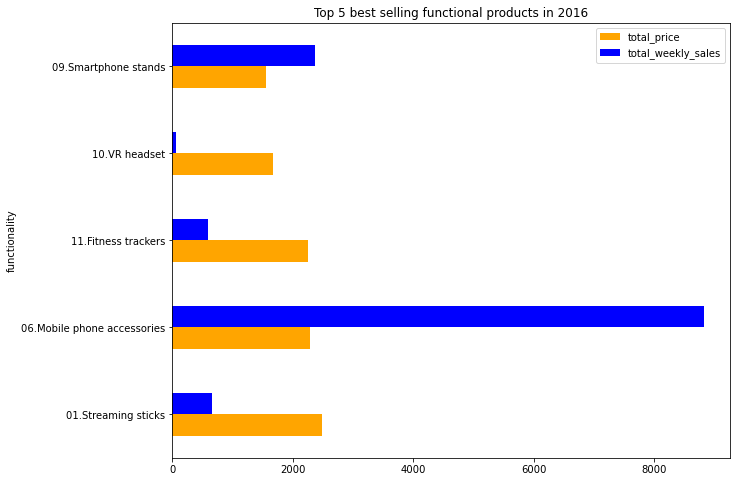

In [12]:
df_2016_bang1_top5.plot.barh(rot=0,figsize = (10,8),title ="Top 5 best selling functional products in 2016",color={"total_price": "orange", "total_weekly_sales":"blue"})

In [ ]:
df_2016_bang1_top5.to_excel('G:/Case Study/data_raw_1.xlsx')
df_2016_bang1.to_excel('G:/Case Study/df_2016_bang1.xlsx')

In [14]:
df_01 = df_00[(df_00['functionality'] == '01.Streaming sticks') & (df_00['year'] == 2016)]
df_01 = df_01.drop('year',axis = 1)
df_01_bang1 = df_01.groupby('month').sum()
df_01_bang1

,weekly_sales,price,vendor
month,,,
10,60,314.90,32
11,331,989.42,128
12,261,1185.11,128


In [15]:
df_2016_bang1['total_weekly_sales'].sum()
df_2016.vendor.sum()

2736

In [16]:
df_2017 = df_00[df_00['year'] == 2017]
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2288 entries, 9 to 4360
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weekly_sales   2288 non-null   int64  
 1   color          2288 non-null   object 
 2   price          2288 non-null   float64
 3   vendor         2288 non-null   int64  
 4   functionality  2288 non-null   object 
 5   month          2288 non-null   int64  
 6   year           2288 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 143.0+ KB


In [17]:
df_2017_bang1 = df_2017.groupby(['functionality']).agg(total_price = ('price','sum'),total_weekly_sales = ('weekly_sales','sum'))
df_2017_bang2 = df_2017.groupby(['functionality']).agg(total_price = ('price','sum'),total_weekly_sales = ('weekly_sales','sum'),total_vendor = ('vendor','sum'))
df_2017_bang2

,total_price,total_weekly_sales,total_vendor
functionality,,,
01.Streaming sticks,13793.30,7557,1664
02.Portable smartphone chargers,6752.31,21867,2080
03.Bluetooth speakers,5764.51,1733,520
04.Selfie sticks,6391.25,77332,2132
05.Bluetooth tracker,655.42,5975,104
06.Mobile phone accessories,15789.14,57158,4004
07.Headphones,8679.01,662,104
08.Digital pencils,6967.03,3731,624
09.Smartphone stands,8890.39,12588,2652


In [18]:
df_2017_bang1_top5 = df_2017_bang1.sort_values('total_price',ascending=False).head(5)
df_2017_bang1_top5

,total_price,total_weekly_sales
functionality,,
06.Mobile phone accessories,15789.14,57158
11.Fitness trackers,14052.78,4980
01.Streaming sticks,13793.30,7557
10.VR headset,9628.93,606
09.Smartphone stands,8890.39,12588


In [19]:
df_02 = df_00[(df_00['functionality'] == '06.Mobile phone accessories') & (df_00['year'] == 2017)]
df_02 = df_02.drop('year',axis = 1)
df_02.info()
df_02

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 9 to 3960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weekly_sales   572 non-null    int64  
 1   color          572 non-null    object 
 2   price          572 non-null    float64
 3   vendor         572 non-null    int64  
 4   functionality  572 non-null    object 
 5   month          572 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 31.3+ KB


,weekly_sales,color,price,vendor,functionality,month
9,154,black,9.19,6,06.Mobile phone accessories,1
10,85,black,11.91,6,06.Mobile phone accessories,1
11,11,black,23.19,6,06.Mobile phone accessories,1
12,19,black,20.59,6,06.Mobile phone accessories,1
13,17,black,20.74,6,06.Mobile phone accessories,1
...,...,...,...,...,...,...
3956,206,black,6.47,5,06.Mobile phone accessories,11
3957,148,black,7.56,5,06.Mobile phone accessories,12
3958,156,black,7.52,5,06.Mobile phone accessories,12
3959,152,black,5.44,5,06.Mobile phone accessories,12


In [20]:
df_02_bang1 = df_02.groupby(['month','color']).sum()[['weekly_sales','price','vendor']].reset_index()
df_02_bang2 = df_02.groupby('month').sum().sort_values('price',ascending = False)
df_02_bang3 = df_02_bang1[df_02_bang1['month'] == 7].sort_values('price',ascending = False)
df_02_bang1

,month,color,weekly_sales,price,vendor
0,1,black,1320,356.05,85
1,1,blue,128,263.85,80
2,1,grey,2530,423.28,60
3,1,pink,52,94.56,50
4,1,red,2467,220.39,110
5,2,black,819,332.38,68
6,2,blue,94,216.96,64
7,2,grey,1448,342.25,48
8,2,pink,46,84.96,40
9,2,red,275,166.67,88


In [21]:
df_02_bang2

,weekly_sales,price,vendor
month,,,
7,3204,1638.61,385
5,7259,1539.18,385
10,3594,1509.68,385
1,6497,1358.13,385
6,4749,1329.18,308
11,5192,1306.44,308
4,4932,1262.19,308
12,2223,1255.76,308
3,7094,1248.66,308


In [22]:
df_02_bang3

,month,color,weekly_sales,price,vendor
31,7,blue,83,480.82,80
30,7,black,976,412.61,85
32,7,grey,1501,403.11,60
34,7,red,560,264.40,110
33,7,pink,84,77.67,50


In [23]:
(df_02_bang3.iloc[0,3] / df_02_bang2.iloc[0,1])*100 

29.343162802619293

In [ ]:
df_02_bang2.to_excel('G:/Case Study/data_2017_month.xlsx')
df_2017_bang2.to_excel('G:/Case Study/df_2017_bang2.xlsx')

In [24]:
df_2017_bang1['total_weekly_sales'].sum()
df_2017.vendor.sum()

15808

In [25]:
#__________________________________ 2018 _____________________________________
df_2018 = df_00[df_00['year'] == 2018]
df_2018.info()
df_2018

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716 entries, 61 to 4399
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weekly_sales   1716 non-null   int64  
 1   color          1716 non-null   object 
 2   price          1716 non-null   float64
 3   vendor         1716 non-null   int64  
 4   functionality  1716 non-null   object 
 5   month          1716 non-null   int64  
 6   year           1716 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 107.2+ KB


,weekly_sales,color,price,vendor,functionality,month,year
61,7,black,24.30,6,06.Mobile phone accessories,1,2018
62,13,black,25.49,6,06.Mobile phone accessories,1,2018
63,11,black,24.80,6,06.Mobile phone accessories,1,2018
64,6,black,26.49,6,06.Mobile phone accessories,1,2018
65,5,black,25.49,6,06.Mobile phone accessories,1,2018
...,...,...,...,...,...,...,...
4395,20,black,53.99,6,09.Smartphone stands,8,2018
4396,14,color,52.99,6,09.Smartphone stands,9,2018
4397,22,black,44.99,6,09.Smartphone stands,9,2018
4398,28,color,42.99,6,09.Smartphone stands,9,2018


In [26]:
df_2018_bang1 = df_2018.groupby(['functionality']).agg(total_price = ('price','sum'),total_weekly_sales = ('weekly_sales','sum'))
df_2018_bang2 = df_2018.groupby(['functionality']).agg(total_price = ('price','sum'),total_weekly_sales = ('weekly_sales','sum'),total_vendor = ('vendor','sum'))
df_2018_bang2

,total_price,total_weekly_sales,total_vendor
functionality,,,
01.Streaming sticks,10256.12,8451,1248
02.Portable smartphone chargers,6316.20,15929,1560
03.Bluetooth speakers,4548.66,1115,390
04.Selfie sticks,5671.45,51758,1599
05.Bluetooth tracker,400.46,3950,78
06.Mobile phone accessories,12544.18,33993,3003
07.Headphones,6772.38,1082,78
08.Digital pencils,5391.04,2382,468
09.Smartphone stands,6775.56,8665,1989


In [27]:
df_2018_bang1_top5 = df_2018_bang1.sort_values('total_price',ascending=False).head(5)
df_2018_bang1_top5

,total_price,total_weekly_sales
functionality,,
06.Mobile phone accessories,12544.18,33993
11.Fitness trackers,11957.00,2869
01.Streaming sticks,10256.12,8451
10.VR headset,7571.32,790
09.Smartphone stands,6775.56,8665


In [28]:
df_03 = df_00[(df_00['functionality'] == '06.Mobile phone accessories') & (df_00['year'] == 2018)]
df_03 = df_03.drop('year',axis = 1)
df_03

,weekly_sales,color,price,vendor,functionality,month
61,7,black,24.30,6,06.Mobile phone accessories,1
62,13,black,25.49,6,06.Mobile phone accessories,1
63,11,black,24.80,6,06.Mobile phone accessories,1
64,6,black,26.49,6,06.Mobile phone accessories,1
65,5,black,25.49,6,06.Mobile phone accessories,1
...,...,...,...,...,...,...
3995,56,black,16.04,5,06.Mobile phone accessories,8
3996,61,black,15.04,5,06.Mobile phone accessories,9
3997,58,black,17.04,5,06.Mobile phone accessories,9
3998,66,black,10.86,5,06.Mobile phone accessories,9


In [29]:
df_03_bang1 = df_03.groupby(['month','color']).sum()[['weekly_sales','price','vendor']].reset_index()
df_03_bang2 = df_03.groupby('month').sum().sort_values('price',ascending = False)
df_03_bang3 = df_03_bang1[df_03_bang1['month'] == 1].sort_values('price',ascending = False)
df_03_bang1

,month,color,weekly_sales,price,vendor
0,1,black,992,354.55,85
1,1,blue,86,434.69,80
2,1,grey,2487,525.30,60
3,1,pink,46,124.66,50
4,1,red,851,251.74,110
5,2,black,568,283.88,68
6,2,blue,47,394.25,64
7,2,grey,785,325.78,48
8,2,pink,33,128.96,40
9,2,red,233,219.46,88


In [30]:
df_03_bang3

,month,color,weekly_sales,price,vendor
2,1,grey,2487,525.30,60
1,1,blue,86,434.69,80
0,1,black,992,354.55,85
4,1,red,851,251.74,110
3,1,pink,46,124.66,50


In [31]:
(df_03_bang3.iloc[0,3] / df_03_bang2.iloc[0,1])*100 

31.06556116716146

In [ ]:
df_03_bang2.to_excel('G:/Case Study/data_2018_month.xlsx')
df_2018_bang2.to_excel('G:/Case Study/data_2018_bang2.xlsx')

In [32]:
df_2018_bang1['total_weekly_sales'].sum()
df_2018.vendor.sum()

11856

In [33]:
#__________________________________ Total ____________________________________
df_total = (df_2016_bang1 + df_2017_bang1 + df_2018_bang1).reset_index()
df_total = df_total.sort_values('total_price',ascending=False)
df_total

,functionality,total_price,total_weekly_sales
5,06.Mobile phone accessories,30616.89,99982
10,11.Fitness trackers,28270.54,8437
0,01.Streaming sticks,26538.85,16660
9,10.VR headset,18874.08,1463
8,09.Smartphone stands,17226.92,23623
6,07.Headphones,16808.64,1910
1,02.Portable smartphone chargers,14337.61,39689
7,08.Digital pencils,13647.87,6787
3,04.Selfie sticks,12977.23,140062
2,03.Bluetooth speakers,11300.63,3115


In [34]:
df_total_top3 = df_total.head(3)
df_total_tail3 = df_total.tail(3)
df_total_top3

,functionality,total_price,total_weekly_sales
5,06.Mobile phone accessories,30616.89,99982
10,11.Fitness trackers,28270.54,8437
0,01.Streaming sticks,26538.85,16660


In [35]:
df_total_tail3

,functionality,total_price,total_weekly_sales
2,03.Bluetooth speakers,11300.63,3115
11,12.Flash drives,3707.61,12909
4,05.Bluetooth tracker,1197.05,10804


In [36]:
df_total_1 = df.groupby(['year']).sum()[['weekly_sales','price','vendor']].reset_index()
df_total_1

,year,weekly_sales,price,vendor
0,2016,28538,16480.11,2736
1,2017,200686,99123.25,15808
2,2018,136217,79900.56,11856


In [44]:
df.weekly_sales.sum()
df.vendor.sum()

30400

# MACHINE LEARNING

In [46]:
df_ML_00 = pd.read_excel('G:/Case Study/data_raw_datach.xlsx')
df_ML_00 = df_ML_00.dropna()
df_ML_00

,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality
0,2016-10-31,1,135,True,black,10.16,6,06.Mobile phone accessories
1,2016-11-07,1,102,True,black,9.86,6,06.Mobile phone accessories
2,2016-11-14,1,110,True,black,10.24,6,06.Mobile phone accessories
3,2016-11-21,1,127,True,black,8.27,6,06.Mobile phone accessories
4,2016-11-28,1,84,True,black,8.83,6,06.Mobile phone accessories
...,...,...,...,...,...,...,...,...
4393,2018-08-13,44,52,True,black,43.99,6,09.Smartphone stands
4394,2018-08-20,44,29,True,black,42.38,6,09.Smartphone stands
4395,2018-08-27,44,20,False,black,53.99,6,09.Smartphone stands
4397,2018-09-10,44,22,True,black,44.99,6,09.Smartphone stands


In [47]:
df_ML_00.isnull().sum()

week              0
sku               0
weekly_sales      0
feat_main_page    0
color             0
price             0
vendor            0
functionality     0
dtype: int64

In [48]:
df_ML_01 = df_ML_00[['weekly_sales','feat_main_page','color','price','vendor','functionality']]
df_ML_01['feat_main_page'] = df_ML_01['feat_main_page'].replace(['True','False'],['1','0']).astype('int')
df_ML_01['color'].value_counts()
df_ML_01

C:\Users\khacd\AppData\Local\Temp\ipykernel_27296\466849497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML_01['feat_main_page'] = df_ML_01['feat_main_page'].replace(['True','False'],['1','0']).astype('int')


,weekly_sales,feat_main_page,color,price,vendor,functionality
0,135,1,black,10.16,6,06.Mobile phone accessories
1,102,1,black,9.86,6,06.Mobile phone accessories
2,110,1,black,10.24,6,06.Mobile phone accessories
3,127,1,black,8.27,6,06.Mobile phone accessories
4,84,1,black,8.83,6,06.Mobile phone accessories
...,...,...,...,...,...,...
4393,52,1,black,43.99,6,09.Smartphone stands
4394,29,1,black,42.38,6,09.Smartphone stands
4395,20,0,black,53.99,6,09.Smartphone stands
4397,22,1,black,44.99,6,09.Smartphone stands


In [49]:
df_ML_01['color'] = df_ML_01['color'].replace(['none','black','blue','red','green','grey','white','gold','purple','pink'],
                                              ['0','1','2','3','4','5','6','7','8','9']).astype('int')
df_ML_01['functionality'].value_counts()
df_ML_01['functionality'] = df_ML_01['functionality'].apply(lambda x: x.split('.')[1])
df_ML_01

C:\Users\khacd\AppData\Local\Temp\ipykernel_27296\1284467796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML_01['color'] = df_ML_01['color'].replace(['none','black','blue','red','green','grey','white','gold','purple','pink'],
C:\Users\khacd\AppData\Local\Temp\ipykernel_27296\1284467796.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML_01['functionality'] = df_ML_01['functionality'].apply(lambda x: x.split('.')[1])


,weekly_sales,feat_main_page,color,price,vendor,functionality
0,135,1,1,10.16,6,Mobile phone accessories
1,102,1,1,9.86,6,Mobile phone accessories
2,110,1,1,10.24,6,Mobile phone accessories
3,127,1,1,8.27,6,Mobile phone accessories
4,84,1,1,8.83,6,Mobile phone accessories
...,...,...,...,...,...,...
4393,52,1,1,43.99,6,Smartphone stands
4394,29,1,1,42.38,6,Smartphone stands
4395,20,0,1,53.99,6,Smartphone stands
4397,22,1,1,44.99,6,Smartphone stands


In [51]:
"one Hot Encoding"
dum = pd.get_dummies(df_ML_01.functionality)
df_concat = pd.concat([df_ML_01, dum], axis = 'columns')  
df_chinh = df_concat.drop('functionality',axis = 1)  
df_chinh

,weekly_sales,feat_main_page,color,price,vendor,Bluetooth speakers,Bluetooth tracker,Digital pencils,Fitness trackers,Flash drives,Headphones,Mobile phone accessories,Portable smartphone chargers,Selfie sticks,Smartphone stands,Streaming sticks,VR headset
0,135,1,1,10.16,6,0,0,0,0,0,0,1,0,0,0,0,0
1,102,1,1,9.86,6,0,0,0,0,0,0,1,0,0,0,0,0
2,110,1,1,10.24,6,0,0,0,0,0,0,1,0,0,0,0,0
3,127,1,1,8.27,6,0,0,0,0,0,0,1,0,0,0,0,0
4,84,1,1,8.83,6,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,52,1,1,43.99,6,0,0,0,0,0,0,0,0,0,1,0,0
4394,29,1,1,42.38,6,0,0,0,0,0,0,0,0,0,1,0,0
4395,20,0,1,53.99,6,0,0,0,0,0,0,0,0,0,1,0,0
4397,22,1,1,44.99,6,0,0,0,0,0,0,0,0,0,1,0,0


In [53]:
" Separate out the independent variable and The target variable "
x = df_chinh.drop('price',axis = 1)
y = df_chinh.price
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2 )
from sklearn.linear_model import LinearRegression
lr_cl = LinearRegression() 
lr_cl.fit(x_train, y_train)


LinearRegression()

In [54]:
x_test

,weekly_sales,feat_main_page,color,vendor,Bluetooth speakers,Bluetooth tracker,Digital pencils,Fitness trackers,Flash drives,Headphones,Mobile phone accessories,Portable smartphone chargers,Selfie sticks,Smartphone stands,Streaming sticks,VR headset
2957,165,0,5,6,0,0,0,0,0,0,1,0,0,0,0,0
2225,226,0,4,4,0,0,0,0,0,0,0,0,1,0,0,0
62,13,0,1,6,0,0,0,0,0,0,1,0,0,0,0,0
1099,135,0,1,10,0,0,0,0,0,0,0,0,0,0,1,0
3698,33,0,7,7,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,239,0,2,3,0,0,0,0,0,0,0,0,1,0,0,0
528,23,0,2,3,0,0,0,0,0,0,0,0,1,0,0,0
2369,8,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0
2133,177,0,6,2,0,1,0,0,0,0,0,0,0,0,0,0


In [55]:
y_test

2957    22.10
2225    16.38
62      25.49
1099    21.76
3698    23.67
        ...  
681      9.82
528     30.70
2369    29.89
2133    12.12
4165    43.99
Name: price, Length: 878, dtype: float64

In [56]:
" Test " 
lr_cl.score(x_test,y_test) # đúng 82%

0.8166754639756464

In [57]:
# Funtion Enter parameters 
def price_dudoan(functionality,weekly_sales,feat_main_page,color,vendor):
 lo_index = np.where(x.columns == functionality)[0][0]
 z = np.zeros(len(x.columns))
 z[0] = weekly_sales
 z[1] = feat_main_page
 z[2] = color
 z[3] = vendor
 if lo_index > 0:
     z[lo_index] = 1
 return lr_cl.predict([z])[0]

In [59]:
# Enter parameters 
# TEST: 
# Functionality : Selfie sticks
# Weekly_sales : 94 
# Feat_main_page : 0
# Color : green equivalent 4 
# Vendor : 4 
price_dudoan('Selfie sticks',96,0,4,4)

D:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


22.92014056955972